Matthew Dacre 2091295

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import cv2

In [2]:
def edge(img):

    '''
    Draws and then superimposes edges onto img
    Done by performing adaptive thresholding on a smoothed, grayscale version of img
    '''

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgSmoothed = cv2.medianBlur(imgGray, 7)

    edges = np.invert(cv2.Canny(imgSmoothed, 100, 200))

    imgEdged = cv2.bitwise_and(img, img, mask=edges)

    return imgEdged

def kmeans(img):

    '''
    Performs kmeans clustering on img, using 16 clusters. Starting points for the clusters are chosen randomly.
    '''

    Z = img.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 16

    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    return res2

def saturation(img):

    '''
    Increases saturation of image. Done by first converting image to HSV and then scaling the saturation values
    '''

    hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsvImg[..., 1] = hsvImg[..., 1]*1.5

    imgSat = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)

    return imgSat

def pipeline(pipe, img):
    for p in pipe:
        img = p(img)

    return img

Starts by getting edges of image from a smoothed gray scale image. Edges are then enhanced by opening them with a kernel of ones of size (3,3)

Processing image using pipeline: 1
Processing image using pipeline: 2
Processing image using pipeline: 3
Processing image using pipeline: 4
Processing image using pipeline: 5
Processing image using pipeline: 6


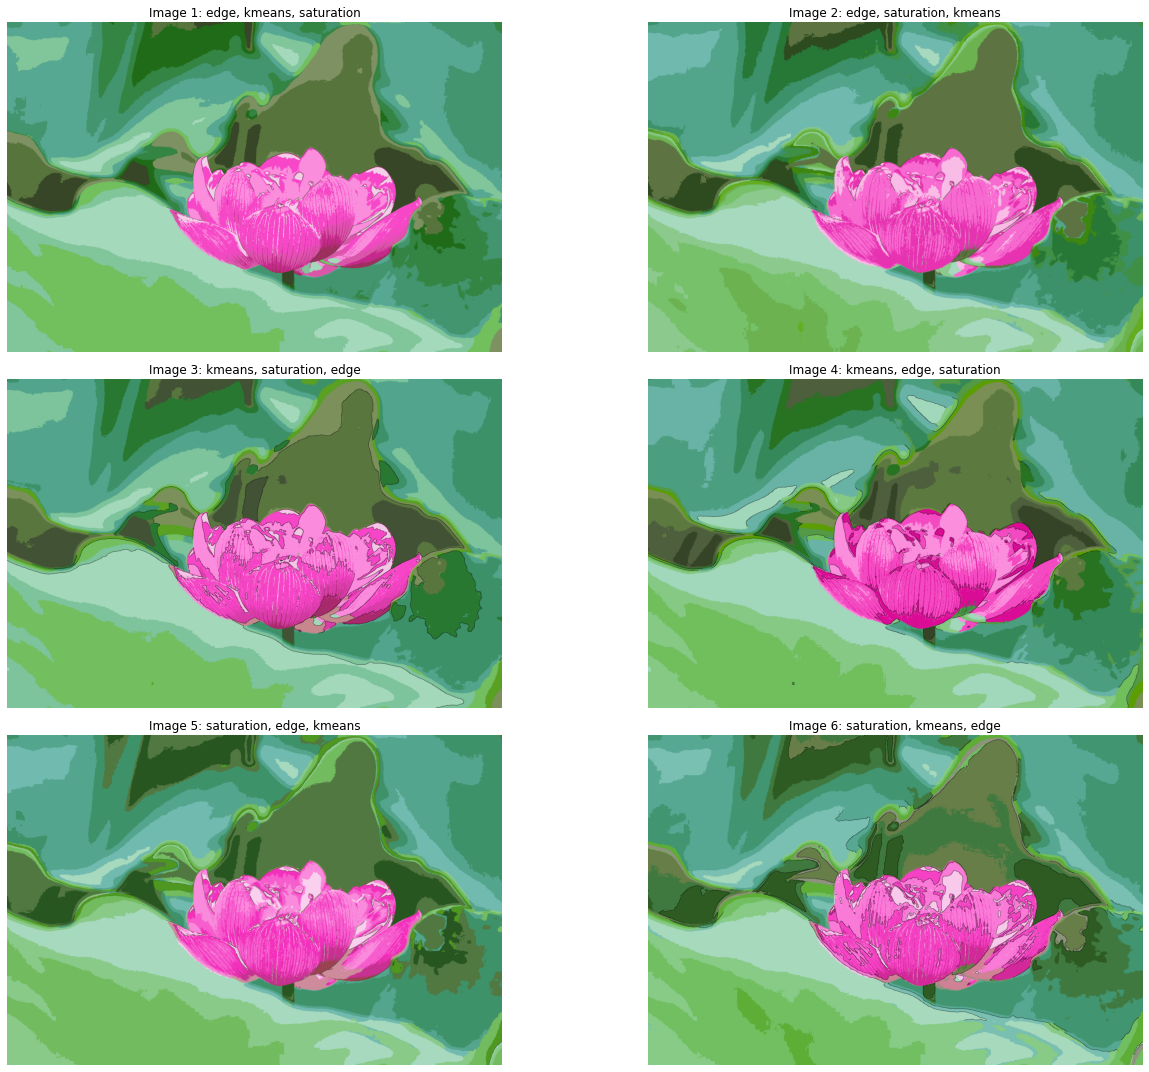

In [10]:
'''
This cell processes an input image using all possible permutations of the three effects.
'''

def make_title(pipe, i):
    s = "Image " + str(i) + ": "
    for func in pipe:
        s += func.__name__ + ", "

    return s[:-2]

imName = "./images/flower.jpg"
img = cv2.imread(imName)

options = [
    [edge, kmeans, saturation],
    [edge, saturation, kmeans],
    [kmeans, saturation, edge],
    [kmeans, edge, saturation],
    [saturation, edge, kmeans],
    [saturation, kmeans, edge]
    ]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

ax = axs.ravel()

for i, pipe in enumerate(options):
    print("Processing image using pipeline:", i+1)
    res = cv2.cvtColor(pipeline(pipe, img), cv2.COLOR_BGR2RGB)
    t = make_title(pipe, i+1)
    ax[i].imshow(res)
    ax[i].set_title(t)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Processing image: flower.jpg
Processing image: meeting1.jpg
Processing image: meeting2.jpg
Processing image: mountain.jpg
Processing image: person1.jpg
Processing image: person2.jpg
Processing image: squirrel.jpg
Processing image: tree.jpg


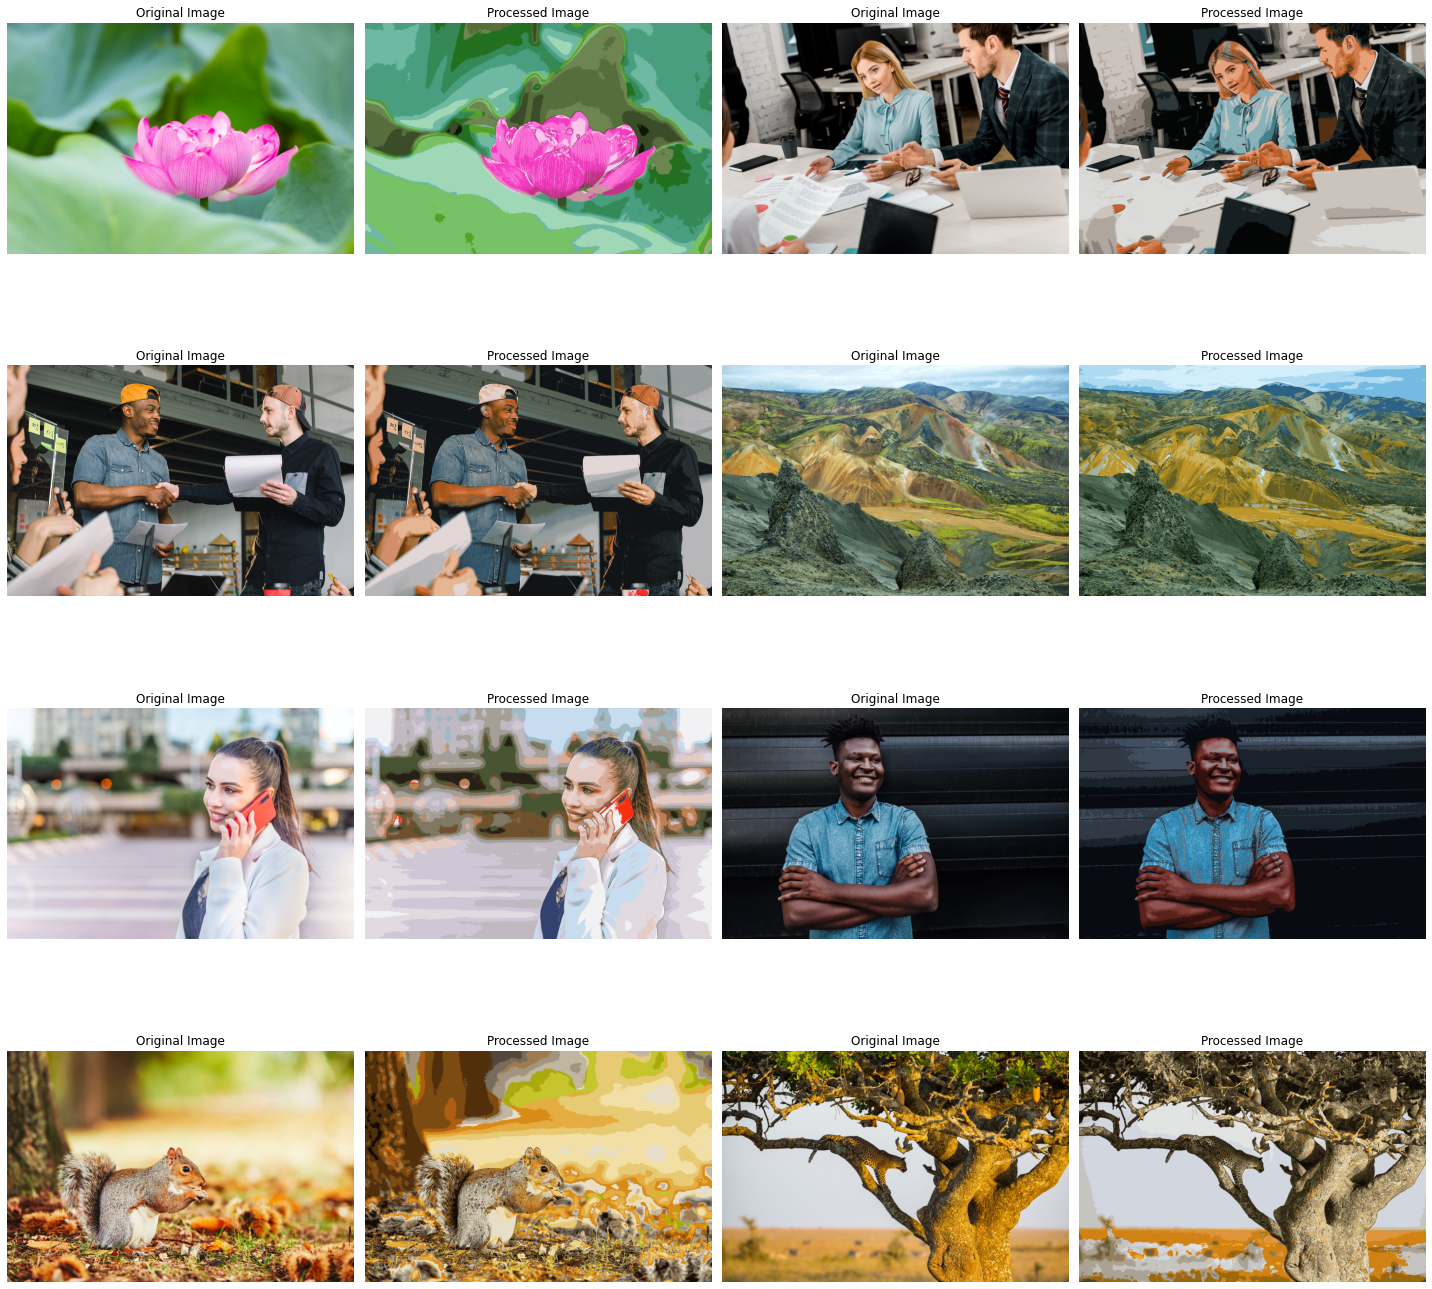

In [12]:
'''
This cell runs a single pipeline on every image defined in `images`, and plots the original and processed images
'''

final_pipeline = [edge, saturation, kmeans]
images = ["flower.jpg", "meeting1.jpg", "meeting2.jpg", "mountain.jpg", "person1.jpg", "person2.jpg", "squirrel.jpg", "tree.jpg"]

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
ax = axs.ravel()
plot_spot = 0
for img_name in images:
    print("Processing image:", img_name)
    img = cv2.imread("./images/" + img_name)
    img_processed = cv2.cvtColor(pipeline(final_pipeline, img), cv2.COLOR_BGR2RGB)
    img_recolour = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax[plot_spot].imshow(img_recolour)
    ax[plot_spot].set_title("Original Image")

    ax[plot_spot+1].imshow(img_processed)
    ax[plot_spot+1].set_title("Processed Image")

    plot_spot += 2

for a in ax:
    a.axis("off")

fig.tight_layout()
plt.show()